# Assignment 2 by: Jung-De Chiou (s4068959)


# Task 1: Regression


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('A2data.csv', sep=';', decimal=".")



In [2]:
# Ensure density and alcohol columns are numeric (invalid parsing will be set as NaN)
data['density'] = pd.to_numeric(data['density'], errors='coerce')
data['alcohol'] = pd.to_numeric(data['alcohol'], errors='coerce')

#drop rows with missing values in both 'density' and 'alcohol' columns
data_clean = data.dropna(subset=['density','alcohol']) 

# Take a random sample of 200 instances without missing values
sample_data = data_clean.sample(n=200, random_state=42)
sample_data = sample_data[['alcohol','density']] # Select only 'alcohol' and 'density' columns
sample_data.reset_index(drop=True, inplace=True) # Reset the index
sample_data.head(5)

,alcohol,density
0,9.5,0.99340
1,8.8,0.99870
2,10.7,0.99142
3,9.9,0.99360
4,9.5,0.99438


In [3]:
# Write the sample data to a new CSV file
sample_data.to_csv('s4068959-A2SampleOne.csv', index=False)

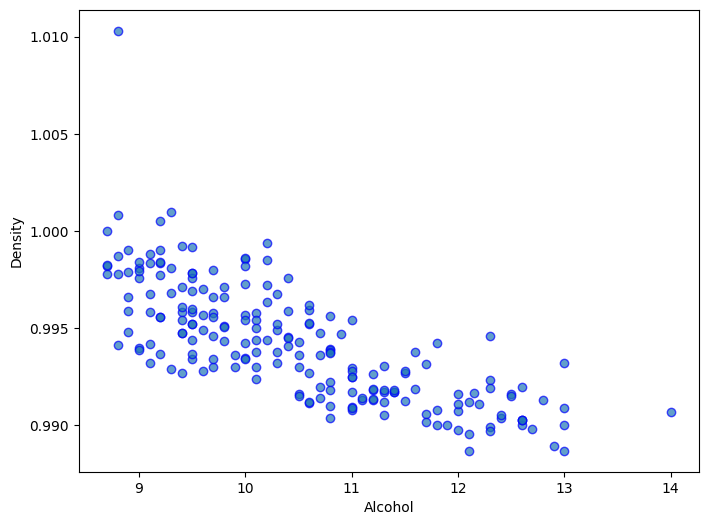

In [4]:

# Plotting the relationship between 'alcohol' and 'density'
plt.figure(figsize=(8,6))
plt.scatter(sample_data['alcohol'],sample_data['density'], alpha=0.7, edgecolors='b')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.show()

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


# Standardize the features (density) and target (alcohol)
# Ensureing that the coefficients of the model are not biased towards features with larger ranges
scaler = StandardScaler()

# Set up the independent (density) and dependent (alcohol) variables
X = scaler.fit_transform(sample_data['density'].values.reshape(-1,1)) # Independent variable (reshaped to 2D for sklearn)
y = sample_data['alcohol'].values # Dependent variable

# Create and fit the linear regression model
liner_model = LinearRegression()
liner_model.fit(X, y)

# Get the model's coefficients
intercept = liner_model.intercept_
slope = liner_model.coef_[0]

# Make predictions using the linear model
y_pre = liner_model.predict(X)

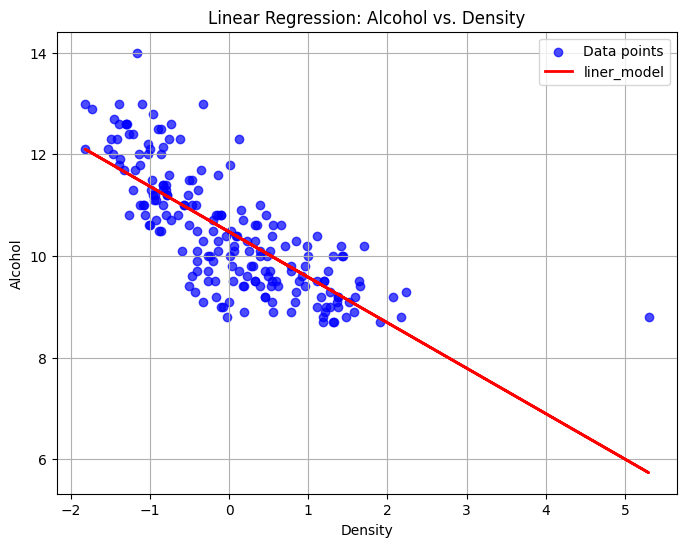

In [6]:
# Plot the data points along with the linear regression line
plt.figure(figsize=(8,6))
plt.scatter(X,y,color='blue',alpha=0.7,label='Data points')
plt.plot(X,y_pre,color='red',label='liner_model',linewidth=2)
plt.title('Linear Regression: Alcohol vs. Density')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared
r2 = r2_score(y, y_pre)

# Calculate Mean Squared Error
mse = mean_squared_error(y, y_pre)

# Print the results
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Output the linear model equation and coefficients
print(f"Linear Model Equation: alcohol = {intercept:.4f} + ({slope:.4f} * density)")

R-squared: 0.5738
Mean Squared Error: 0.5949
Linear Model Equation: alcohol = 10.4758 + (-0.8950 * density)


# Task 2: Classification

In [8]:
import pandas as pd
data = pd.read_csv('A2data.csv', sep=';', decimal=".")

#Convert all columns to numeric (coerce non-numeric values to NaN)
data = data.apply(pd.to_numeric, errors='coerce')

#drop rows with missing columns
data_clean = data.dropna() 

# Take a random sample of 500 instances without missing values
sample_data = data_clean.sample(n=500, random_state=42)

# Write the sample data to a new CSV file
sample_data.to_csv('s4068959-A2SampleTwo.csv', index=False)


## kNN

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define the features (X) and target (y)
X = sample_data.drop('quality',axis=1) # exclude quality column
y = sample_data['quality']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [10]:
# Implement basic kNN classifier
k = 5  # I choose the convention one first
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train,y_train)

# Make predictions
y_pre = knn.predict(X_test)

In [11]:
# Evaluate the classifier
print("Classification Report for Origin kNN:")
print(classification_report(y_test, y_pre))

Classification Report for Origin kNN:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.40      0.68      0.51        28
           6       0.48      0.52      0.50        42
           7       0.00      0.00      0.00        21
           8       0.00      0.00      0.00         5

    accuracy                           0.41       100
   macro avg       0.15      0.20      0.17       100
weighted avg       0.31      0.41      0.35       100



/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples

In [12]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pre)
print(cm)

[[ 0  0  1  0  0  0]
 [ 0  0  3  0  0  0]
 [ 0  1 19  7  1  0]
 [ 0  0 15 22  5  0]
 [ 0  0  8 13  0  0]
 [ 0  0  1  4  0  0]]


## modified kNN 

In [13]:
# Standardize the data (important for distance-based algorithms like kNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# Here I use the same mean and standard deviation computed from the training data because we want to apply the same scaling to the test data.
# Otherwise, if we were to fit the scaler again on the test data, it would lead to data leakage.
X_test = scaler.transform(X_test)

In [14]:
# Adopt weight='distance' and Manhattan distance
knn = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
knn.fit(X_train, y_train)
y_pre = knn.predict(X_test)
print("Classification Report for Origin kNN:")
print(classification_report(y_test, y_pre)) 

# Score improve from 0.41 to 0.57

Classification Report for Origin kNN:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.58      0.75      0.66        28
           6       0.55      0.71      0.62        42
           7       0.67      0.29      0.40        21
           8       0.00      0.00      0.00         5

    accuracy                           0.57       100
   macro avg       0.30      0.29      0.28       100
weighted avg       0.53      0.57      0.53       100



/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples

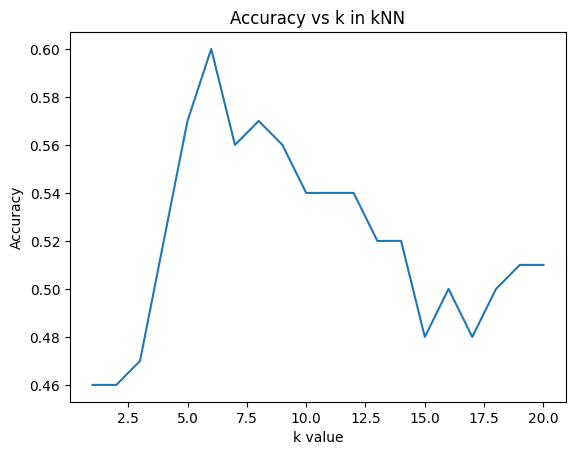

The best k value is: 6 with accuracy: 0.6000


In [15]:
# Test a range of k values
k_values = range(1,21) # Testing k values from 1 to 20
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
    knn.fit(X_train, y_train)
    y_pre = knn.predict(X_test)

    # Compute accuracy and append to list
    acc = accuracy_score(y_test, y_pre)
    accuracies.append(acc)

# Plot k values vs accuracy to visualize the best k
plt.plot(k_values, accuracies)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k in kNN')
plt.show()

# Print the best k value
best_k = k_values[np.argmax(accuracies)]
print(f"The best k value is: {best_k} with accuracy: {max(accuracies):.4f}") # Score improve from 0.57 to 0.60

In [16]:
# Adopt k = 6, weight='distance' and Manhattan distance
k=6
knn = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1)
knn.fit(X_train, y_train)
y_pre = knn.predict(X_test)
print("Classification Report for modified kNN:")
print(classification_report(y_test, y_pre)) # The best Score now is 0.60
cm = confusion_matrix(y_test, y_pre)
print(cm)

Classification Report for modified kNN:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.59      0.79      0.68        28
           6       0.58      0.76      0.66        42
           7       0.75      0.29      0.41        21
           8       0.00      0.00      0.00         5

    accuracy                           0.60       100
   macro avg       0.32      0.31      0.29       100
weighted avg       0.57      0.60      0.55       100

[[ 0  0  0  1  0  0]
 [ 0  0  2  1  0  0]
 [ 0  0 22  5  1  0]
 [ 0  0 10 32  0  0]
 [ 0  0  3 12  6  0]
 [ 0  0  0  4  1  0]]


/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples

###  --- Feature Selection ---

In [17]:
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
selected_features = []
best_score = 0.0
col_num = X.shape[1] # Number of columns/features in the dataset
col_indice_random = shuffle(range(0,col_num),random_state=42)

# Loop over each feature (randomly shuffled)
for i in col_indice_random:
    selected_features.append(i) # Add the current feature
    new_data = X.iloc[:, selected_features]  # Subset of the data with selected features

    # Use cross-validation to evaluate the model performance with current set of features
    clf = KNeighborsClassifier(n_neighbors=6, weights='distance', p=1)
    scores = cross_val_score(clf, new_data, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    avg_score = np.mean(scores)  # Get the average accuracy from cross-validation
    
    # If the score decreases, remove the feature
    if avg_score > best_score:
        best_score = avg_score  # Update best score
        print(f"Selected {len(selected_features)} features, Accuracy: {best_score:.4f}")
    else:
        selected_features.pop()  # Remove the feature if it doesn't improve performance

# After the loop, the best subset of features will remain in 'selected_features'
print("Best subset of features (column indices):", selected_features)

/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Selected 1 features, Accuracy: 0.3940


/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Selected 2 features, Accuracy: 0.4280
Selected 3 features, Accuracy: 0.4400
Selected 4 features, Accuracy: 0.4560
Selected 5 features, Accuracy: 0.4620
Selected 6 features, Accuracy: 0.4680
Selected 7 features, Accuracy: 0.4700
Best subset of features (column indices): [5, 10, 2, 1, 8, 4, 7]


/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.wa

In [18]:
# Rerun the kNN use the best subset of features ('new_Ind')
# Create a subset of the data using the selected features
X_selected = X.iloc[:, selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardize the data 
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_selected = scaler.fit_transform(X_train)
X_test_selected = scaler.transform(X_test)

# At the same time, change to weighted kNN and Manhattan distance
k = 6
knn = KNeighborsClassifier(n_neighbors = k, weights='distance', p=1)
knn.fit(X_train,y_train)

# Make predictions
y_pre = knn.predict(X_test)

# Evaluate the classifier
print("Classification Report for modified kNN:")
print(classification_report(y_test, y_pre))

Classification Report for modified kNN:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.41      0.64      0.50        28
           6       0.52      0.55      0.53        42
           7       0.10      0.05      0.06        21
           8       1.00      0.20      0.33         5

    accuracy                           0.43       100
   macro avg       0.34      0.24      0.24       100
weighted avg       0.41      0.43      0.39       100



/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples

### "Feature Selection lead to the decreasing of score, so I won't adopt it"


## Decision Tree & comparison

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)

# Evaluate performance on the test set
y_pre_tree = tree_clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pre_tree))

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.35      0.46      0.40        28
           6       0.42      0.33      0.37        42
           7       0.29      0.19      0.23        21
           8       0.00      0.00      0.00         5

    accuracy                           0.31       100
   macro avg       0.18      0.16      0.17       100
weighted avg       0.34      0.31      0.32       100



/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples

### Tune the parameter

In [20]:
# Try different max_depth values
for depth in range(3,11):
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_clf.fit(X_train, y_train)
    
    y_pred_tree = tree_clf.predict(X_test)
    tree_accuracy = accuracy_score(y_test, y_pred_tree)
    print(f"Max Depth = {depth}, Accuracy: {tree_accuracy:.4f}")
#from result, set the best_depth = 3
best_depth = 3

Max Depth = 3, Accuracy: 0.5000
Max Depth = 4, Accuracy: 0.4600
Max Depth = 5, Accuracy: 0.4700
Max Depth = 6, Accuracy: 0.4000
Max Depth = 7, Accuracy: 0.4000
Max Depth = 8, Accuracy: 0.3700
Max Depth = 9, Accuracy: 0.3500
Max Depth = 10, Accuracy: 0.3700


In [21]:
# Try different min_samples_split values
for min_split in range(2,21,2):
    tree_clf = DecisionTreeClassifier(max_depth=best_depth, min_samples_split=min_split, random_state=42)
    tree_clf.fit(X_train, y_train)
    
    y_pre_tree = tree_clf.predict(X_test)
    tree_accuracy = accuracy_score(y_test, y_pre_tree)
    print(f"Min Samples Split = {min_split}, Accuracy: {tree_accuracy:.4f}")
best_min_samples_split = 6

Min Samples Split = 2, Accuracy: 0.5000
Min Samples Split = 4, Accuracy: 0.5000
Min Samples Split = 6, Accuracy: 0.5000
Min Samples Split = 8, Accuracy: 0.5000
Min Samples Split = 10, Accuracy: 0.5000
Min Samples Split = 12, Accuracy: 0.5000
Min Samples Split = 14, Accuracy: 0.5000
Min Samples Split = 16, Accuracy: 0.5000
Min Samples Split = 18, Accuracy: 0.5000
Min Samples Split = 20, Accuracy: 0.5000


In [22]:
# Test different min_samples_leaf values
for min_leaf in range(1,21):  # Testing common values
    tree_clf = DecisionTreeClassifier(max_depth=best_depth, min_samples_split=best_min_samples_split, min_samples_leaf=min_leaf, random_state=42)
    tree_clf.fit(X_train, y_train)
    y_pre_tree = tree_clf.predict(X_test)
    
    # Calculate accuracy
    tree_accuracy = accuracy_score(y_test, y_pre_tree)
    print(f"min_samples_leaf={min_leaf}, Accuracy: {tree_accuracy:.4f}")

best_min_samples_leaf = 19

min_samples_leaf=1, Accuracy: 0.5000
min_samples_leaf=2, Accuracy: 0.5000
min_samples_leaf=3, Accuracy: 0.5000
min_samples_leaf=4, Accuracy: 0.5000
min_samples_leaf=5, Accuracy: 0.5000
min_samples_leaf=6, Accuracy: 0.5000
min_samples_leaf=7, Accuracy: 0.5000
min_samples_leaf=8, Accuracy: 0.5000
min_samples_leaf=9, Accuracy: 0.5000
min_samples_leaf=10, Accuracy: 0.5000
min_samples_leaf=11, Accuracy: 0.5000
min_samples_leaf=12, Accuracy: 0.5000
min_samples_leaf=13, Accuracy: 0.5000
min_samples_leaf=14, Accuracy: 0.5000
min_samples_leaf=15, Accuracy: 0.5000
min_samples_leaf=16, Accuracy: 0.4900
min_samples_leaf=17, Accuracy: 0.4700
min_samples_leaf=18, Accuracy: 0.4700
min_samples_leaf=19, Accuracy: 0.5100
min_samples_leaf=20, Accuracy: 0.5100


In [23]:
# Test both gini and entropy criteria
for criterion in ['gini', 'entropy']:
    tree_clf = DecisionTreeClassifier(max_depth=best_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf, criterion=criterion, random_state=42)
    tree_clf.fit(X_train, y_train)
    y_pre_tree = tree_clf.predict(X_test)
    
    # Calculate accuracy
    tree_accuracy = accuracy_score(y_test, y_pre_tree)
    print(f"criterion={criterion}, Accuracy: {tree_accuracy:.4f}")
    
criterion = 'gini'

criterion=gini, Accuracy: 0.5100
criterion=entropy, Accuracy: 0.4900


In [24]:
tree_clf = DecisionTreeClassifier(max_depth=best_depth, min_samples_split=best_min_samples_split, min_samples_leaf=best_min_samples_leaf, criterion=criterion, random_state=42)
tree_clf.fit(X_train, y_train)
y_pre_tree = tree_clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pre_tree))


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         3
           5       0.58      0.68      0.62        28
           6       0.48      0.76      0.59        42
           7       0.00      0.00      0.00        21
           8       0.00      0.00      0.00         5

    accuracy                           0.51       100
   macro avg       0.18      0.24      0.20       100
weighted avg       0.36      0.51      0.42       100



/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/chiouder/Year1/Practical data science in Python/workplace/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples

### Comparison

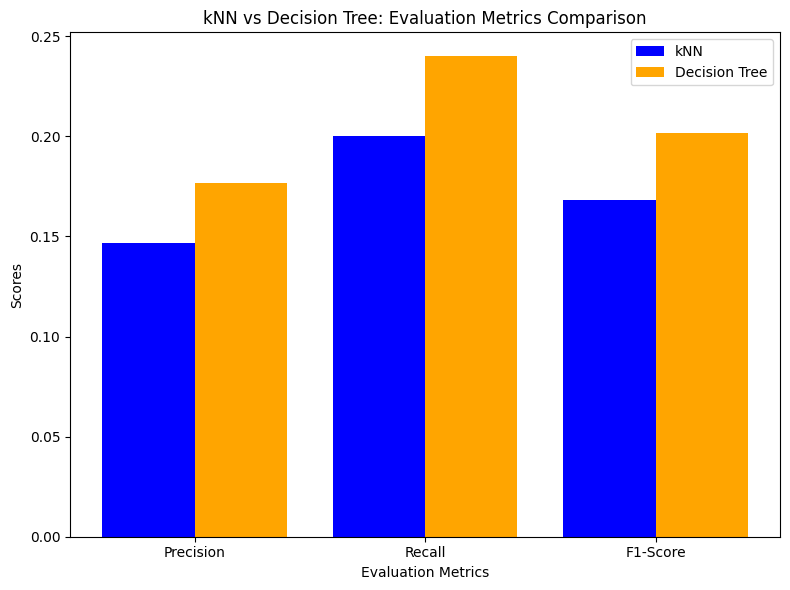

In [25]:
# Average Precision, Recall, and F1-Score for kNN and Decision Tree
knn_avg_precision = np.mean([0.00, 0.00, 0.40, 0.48, 0.00, 0.00])
knn_avg_recall = np.mean([0.00, 0.00, 0.68, 0.52, 0.00, 0.00])
knn_avg_f1 = np.mean([0.00, 0.00, 0.51, 0.50, 0.00, 0.00])

dt_avg_precision = np.mean([0.00, 0.00, 0.58, 0.48, 0.00, 0.00])
dt_avg_recall = np.mean([0.00, 0.00, 0.68, 0.76, 0.00, 0.00])
dt_avg_f1 = np.mean([0.00, 0.00, 0.62, 0.59, 0.00, 0.00])

# Labels for the metrics
metrics_labels = ['Precision', 'Recall', 'F1-Score']
knn_values = [knn_avg_precision, knn_avg_recall, knn_avg_f1]
dt_values = [dt_avg_precision, dt_avg_recall, dt_avg_f1]

# Plot comparison
fig, ax = plt.subplots(figsize=(8, 6))

# Bar width
bar_width = 0.4

# Plot bars for kNN and Decision Tree
ax.bar(np.arange(len(metrics_labels)) - bar_width/2, knn_values, width=bar_width, label='kNN', color='blue')
ax.bar(np.arange(len(metrics_labels)) + bar_width/2, dt_values, width=bar_width, label='Decision Tree', color='orange')

# Add labels and title
ax.set_xlabel('Evaluation Metrics')
ax.set_ylabel('Scores')
ax.set_title('kNN vs Decision Tree: Evaluation Metrics Comparison')
ax.set_xticks(np.arange(len(metrics_labels)))
ax.set_xticklabels(metrics_labels)
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


# Task 3: Clustering

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('A2data.csv', sep=';', decimal=".")

#Convert all columns to numeric (coerce non-numeric values to NaN)
data = data.apply(pd.to_numeric, errors='coerce')

#drop rows with missing columns
data_clean = data.dropna() 

# Take a random sample of 300 instances without missing values
sample_data = data_clean.sample(n=300, random_state=42)

# Write the sample data to a new CSV file
sample_data.to_csv('s4068959-A2SampleThree.csv', index=False)

## k-means

In [27]:
# Drop the 'quality' column for clustering
X = sample_data.drop('quality',axis=1)

# Standardlize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X) # This will return the cluster labels for each point

# Evaluate the model performance using Silhouette Score and Calinski-Harabasz Index
sil_score = silhouette_score(X, clusters) # Use 'clusters' as the labels for silhouette_score
ch_score = calinski_harabasz_score(X, clusters)

# Explanation:
# Silhouette Score measures how similar a data point is to its own cluster (cohesion) 
# compared to other clusters (separation). A value close to 1 indicates better clustering,
# while a value close to -1 means poor clustering.

# Calinski-Harabasz Index assesses the ratio of the sum of within-cluster dispersion 
# to between-cluster dispersion. A higher score means better-defined clusters.

print(f"Silhouette Score (k=5): {sil_score:.4f}")
print(f"Calinski-Harabasz Score (k=5): {ch_score:.4f}")

Silhouette Score (k=5): 0.3354
Calinski-Harabasz Score (k=5): 382.8236


In [28]:
# Test different k values
k_values = range(2,11)
sil_scores = []
ch_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X)

    sil_score = silhouette_score(X, clusters)
    ch_score = calinski_harabasz_score(X, clusters)

    sil_scores.append(sil_score)
    ch_scores.append(ch_score)


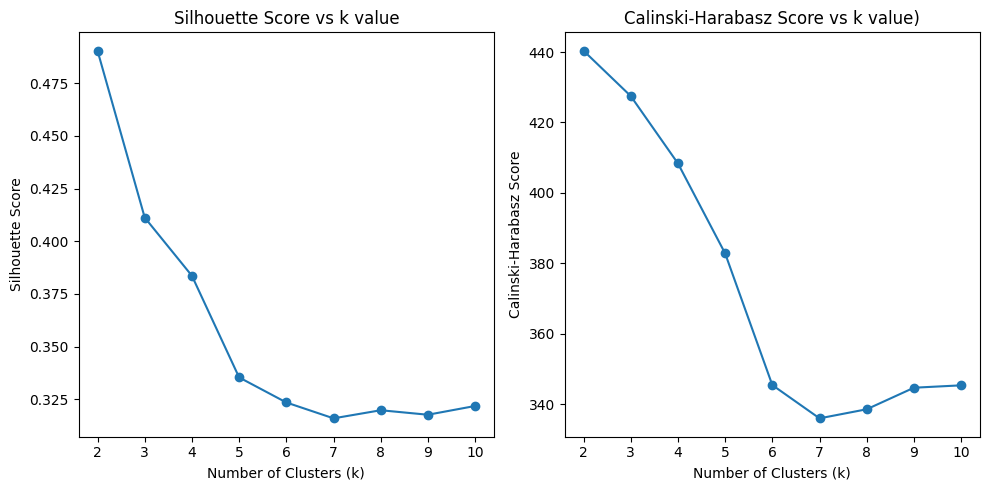

In [29]:
# plot the result
plt.figure(figsize=(10, 5))

# Silhouette Score
plt.subplot(1, 2, 1)
plt.plot(k_values, sil_scores, marker='o')
plt.title("Silhouette Score vs k value")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")

# Calinski-Harabasz Score
plt.subplot(1, 2, 2)
plt.plot(k_values, ch_scores, marker='o')
plt.title("Calinski-Harabasz Score vs k value)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Calinski-Harabasz Score")

plt.tight_layout()
plt.show()

# base on the score choose the best k value
best_k = 2

K-Means Inertia (k=2): 2539.4466
K-Means Inertia (k=3): 2342.1957
K-Means Inertia (k=4): 2139.8736
K-Means Inertia (k=5): 2065.4631
K-Means Inertia (k=6): 1848.0770
K-Means Inertia (k=7): 1727.0823
K-Means Inertia (k=8): 1654.5288
K-Means Inertia (k=9): 1591.2678
K-Means Inertia (k=10): 1561.9269


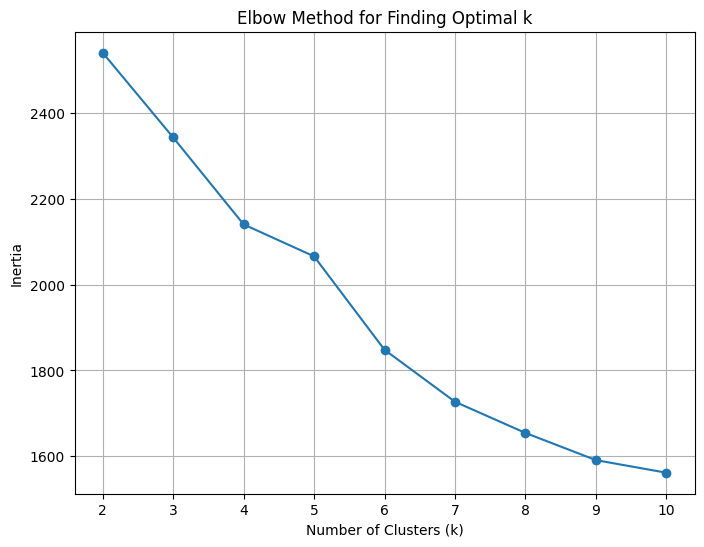

In [30]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Store the inertia values for each k
inertia_values = []

# Iterate over k values from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
    print(f"K-Means Inertia (k={k}): {kmeans.inertia_:.4f}")

# Plot the inertia values to visualize the elbow
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia_values, marker='o')
plt.title('Elbow Method for Finding Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


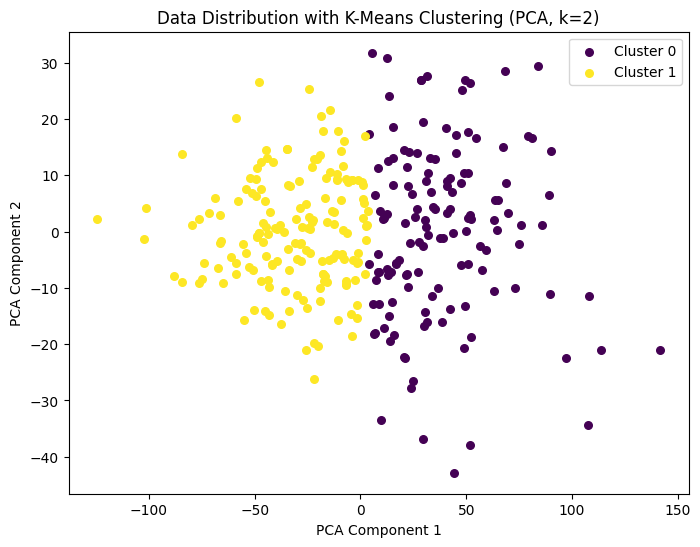

In [31]:
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=best_k, random_state=42) # this k value is based on Silhouette Score and Calinski-Harabasz Index
clusters = kmeans.fit_predict(X)
# Use PCA to reduce the 11-dimensional data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # X is the dataset with 11 features

# Get unique cluster labels
unique_clusters = np.unique(clusters)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))  # Assign different colors to each cluster

# Create the plot
plt.figure(figsize=(8, 6))

# Plot each cluster's points
for i, cluster in enumerate(unique_clusters):
    # Filter the points belonging to the current cluster
    cluster_points = X_pca[clusters == cluster]
    
    # Plot the points for this cluster
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[colors[i]], label=f'Cluster {cluster}', s=30)

# Add title and axis labels
plt.title(f'Data Distribution with K-Means Clustering (PCA, k={best_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Add a legend to show each cluster
plt.legend()
plt.show()


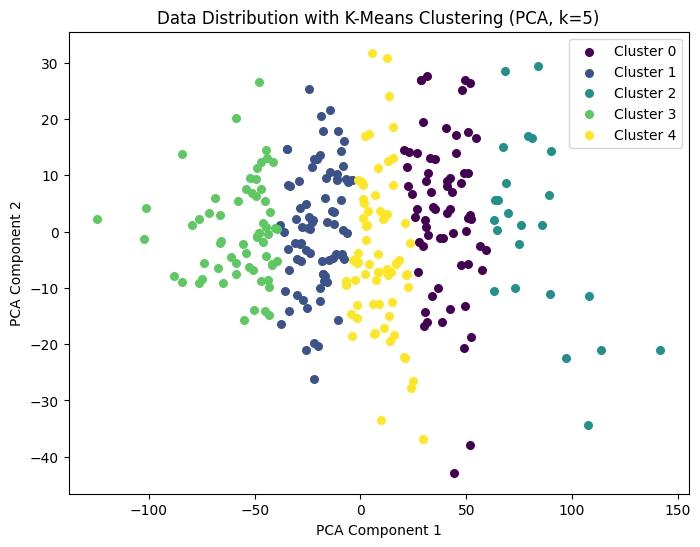

In [32]:
# explore k=5 values
kmeans = KMeans(n_clusters=5, random_state=42) # this k value here is based on inertia
clusters = kmeans.fit_predict(X.drop(['cluster', 'target', 'c'], axis=1, errors='ignore'))

# Use PCA to reduce the 11-dimensional data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  

# Get unique cluster labels
unique_clusters = np.unique(clusters)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))  # Assign different colors to each cluster

# Create the plot
plt.figure(figsize=(8, 6))

# Plot each cluster's points
for i, cluster in enumerate(unique_clusters):
    # Filter the points belonging to the current cluster
    cluster_points = X_pca[clusters == cluster]
    
    # Plot the points for this cluster
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[colors[i]], label=f'Cluster {cluster}', s=30)

# Add title and axis labels
plt.title(f'Data Distribution with K-Means Clustering (PCA, k={5})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Add a legend to show each cluster
plt.legend()
plt.show()


In [33]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(X.drop(['cluster', 'target', 'c'], axis=1, errors='ignore'))
X['cluster']=clusters
X['target']=sample_data['quality']
X['c']='count'
clustering_result = X[['cluster','target','c']].groupby(['cluster','target']).agg('count')
print(clustering_result)

                 c
cluster target    
0       4        3
        5       60
        6       56
        7       15
        8        1
1       3        2
        4        7
        5       43
        6       77
        7       30
        8        6


In [34]:
# explore k = 5 values (the best k from inertia)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X.drop(['cluster', 'target', 'c'], axis=1, errors='ignore'))
X['cluster']=clusters
X['target']=sample_data['quality']
X['c']='count'
clustering_result = X[['cluster','target','c']].groupby(['cluster','target']).agg('count')
print(clustering_result)

                 c
cluster target    
0       4        2
        5       34
        6       26
        7        4
1       5       22
        6       41
        7       12
        8        4
2       5       12
        6        9
        7        2
        8        1
3       3        2
        4        5
        5       11
        6       28
        7       14
        8        2
4       4        3
        5       24
        6       29
        7       13


## DBSCAN & comparison 

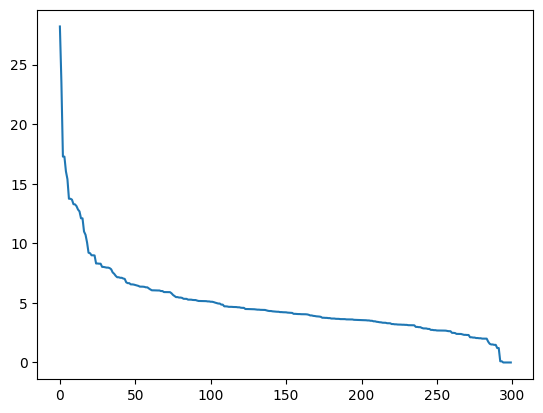

In [35]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

X = sample_data.drop('quality', axis=1)
y = sample_data['quality']  # Use for generating contigency table

# use the best_k we found previously to conduct NearestNeighbors to find the elbow
min_sample = 2
nbrs = NearestNeighbors(n_neighbors=min_sample).fit(X)
distances, indices = nbrs.kneighbors(X)
KDis = distances[:,min_sample-1]
KDis.sort()
KDis = KDis[::-1]

plt.plot(range(0,len(KDis)),KDis)

# from the elbow position, I choose the best_eps as 8.2
best_eps = 8.2

In [36]:
## Evaluate the DBSCAN from silhouette_score, calinski_harabasz_score, and davies_bouldin_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Test different values of min_samples within the range 5 to 15
for min_samples in range(5, 16):
    dbscan = DBSCAN(eps=best_eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X)
    
    # Filter out noise points (label = -1) for evaluation
    mask = clusters != -1
    unique_clusters = len(set(clusters[mask]))  # Count the number of unique clusters, excluding noise points
    
    if mask.sum() > 0 and unique_clusters > 1:  # Ensure at least two distinct clusters
        # Calculate Silhouette Score
        silhouette = silhouette_score(X[mask], clusters[mask])
        
        # Calculate Calinski-Harabasz Index
        calinski_harabasz = calinski_harabasz_score(X[mask], clusters[mask])
        
        # Calculate Davies-Bouldin Index
        davies_bouldin = davies_bouldin_score(X[mask], clusters[mask])
        
        # Print the evaluation metrics for the current min_samples
        print(f"min_samples={min_samples}, Silhouette Score: {silhouette}, "
              f"Calinski-Harabasz Index: {calinski_harabasz}, Davies-Bouldin Index: {davies_bouldin}")
    else:
        print(f"min_samples={min_samples}, All points classified as noise or only one cluster")

# for silhouette_score and calinski_harabasz_score, higher is better. As for davies_bouldin_score, the lower the better
best_min_samples = 11

min_samples=5, Silhouette Score: 0.08069232843346112, Calinski-Harabasz Index: 20.99286366869344, Davies-Bouldin Index: 0.4756625586536422
min_samples=6, Silhouette Score: 0.41397573776309127, Calinski-Harabasz Index: 34.025016679474305, Davies-Bouldin Index: 0.4449968457872229
min_samples=7, Silhouette Score: 0.24973654474433035, Calinski-Harabasz Index: 53.39339912696141, Davies-Bouldin Index: 0.6862477241180832
min_samples=8, Silhouette Score: 0.3108064170655891, Calinski-Harabasz Index: 48.20284797488901, Davies-Bouldin Index: 0.8849120827640103
min_samples=9, All points classified as noise or only one cluster
min_samples=10, Silhouette Score: 0.2206383967877187, Calinski-Harabasz Index: 34.2426239840594, Davies-Bouldin Index: 0.7543912620524791
min_samples=11, Silhouette Score: 0.5002571311104045, Calinski-Harabasz Index: 173.73438049231896, Davies-Bouldin Index: 0.6519023971780936
min_samples=12, Silhouette Score: 0.34942398076464026, Calinski-Harabasz Index: 136.4595685759634, D

In [37]:
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(X)
# Create a contingency table comparing DBSCAN clusters and the true 'quality' labels
contingency_table = pd.crosstab(y, clusters)
# Display the contingency table
print(contingency_table)



col_0    -1   0   1
quality            
3         2   0   0
4         8   1   1
5        77   4  22
6        78  22  33
7        23  10  12
8         2   2   3


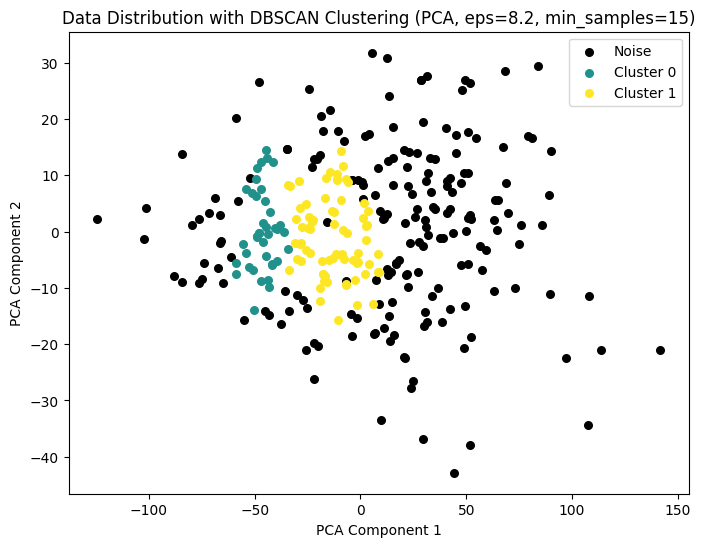

In [38]:
from sklearn.decomposition import PCA

# Using PCA to reduce 11-dimensional data to 2 dimensions so that we can draw it on the x-y axis
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Get unique cluster labels, including noise (-1)
unique_clusters = np.unique(clusters)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))  # Use different colors for each cluster

# Create the figure
plt.figure(figsize=(8, 6))

# Plot the points of each cluster
for i, cluster in enumerate(unique_clusters):
    if cluster == -1:
        # -1 represents noise points in DBSCAN
        color = 'k'  # Use black for noise points
        label = 'Noise'
    else:
        color = colors[i]
        label = f'Cluster {cluster}'
    
    # Filter the points belonging to the current cluster
    cluster_points = X_pca[clusters == cluster]
    
    # Plot the PCA-transformed points in 2D space
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], label=label, s=30)

# Add a title and axis labels
plt.title(f'Data Distribution with DBSCAN Clustering (PCA, eps={best_eps}, min_samples={min_samples})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Add a legend to show each cluster
plt.legend()
plt.show()
